In [1]:
import pandas as pd
import os
import numpy as np
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from pylab import *

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
pd.set_option('display.max_rows', 500)
from pylab import *
from matplotlib.backends.backend_pdf import PdfPages


In [2]:
datalist = [
    'veh',
    'glass',
    'ecoli',
    'yeast',
    'opt',
    'pen',
    'letter',
    'page',
    'satimage',
]
dataframe = []
for d in datalist:
    f = 'cdf_result/' + d + 'xshift.csv'
    data = pd.read_csv(f)
    col = data.columns[1:]
    data = data[col]
    
    
    dmrobust = list(data[col].iloc[4,:][1:])
    dmdr = list(data[col].iloc[5,:][1:])
    sndmdr = list(data[col].iloc[6,:][1:])
    min_dmrobust = ['min_dmrobust'] + list(np.min(np.concatenate((dmrobust, dmdr, sndmdr),axis = 0).reshape(3,len(sndmdr)),axis = 0))
    data.loc[len(data)] = min_dmrobust
    
    robust = list(data[col].iloc[7,:][1:])
    triple = list(data[col].iloc[8,:][1:])
    sntriple = list(data[col].iloc[9,:][1:])
    min_robust = ['min_robust'] + list(np.min(np.concatenate((robust, triple, sntriple),axis = 0).reshape(3,len(robust)),axis = 0))
    data.loc[len(data)] = min_robust

    
    robust = list(data[col].iloc[10,:][1:])
    triple = list(data[col].iloc[11,:][1:])
    sntriple = list(data[col].iloc[12,:][1:])
    min_robust = ['min_robustr'] + list(np.min(np.concatenate((robust, triple, sntriple),axis = 0).reshape(3,len(robust)),axis = 0))
    data.loc[len(data)] = min_robust
    dataframe.append(data)
    
    data.to_csv('final/' + d + 'xshift.csv',index = False)
    
    
    

In [3]:
dataframe[0]

model  [0.95, 0.1, 0]_1_[15, 1, 0]  \
0                known ips                      0.21952   
1              known snips                      0.21811   
2              known ips-r                      0.09289   
3            known snips-r                      0.06373   
4           known dmrobust                      0.12881   
5               known dmdr                      0.13220   
6             known sndmdr                      0.13320   
7             known robust                      0.12082   
8             known triple                      0.12549   
9           known sntriple                      0.12617   
10          known robust-r                      0.03588   
11          known triple-r                      0.07078   
12        known sntriple-r                      0.05967   
13    known triple-robustr                      0.03112   
14  known sntriple-robustr                      0.03117   
15            min_dmrobust                      0.12881   
16              min_robust                      0.12082   
17             min_robustr                      0.03588   

    [0.95, 0.1, 0]_1_[12, 1, 0]  [0.95, 0.1, 0]_1_[9, 1, 0]  \
0                       0.21078                     0.19025   
1                       0.20923                     0.19209   
2                       0.07601                     0.05066   
3                       0.05666                     0.06976   
4                       0.11873                     0.06447   
5                       0.17689                     0.09163   
6                       0.17549                     0.09086   
7                       0.12320                     0.06447   
8                       0.12174                     0.09297   
9                       0.12244                     0.09183   
10                      0.02709                     0.02377   
11                      0.04905                     0.04787   
12                      0.05191                     0.03790   
13                      0.03434                     0.02154   
14                      0.03348                     0.02113   
15                      0.11873                     0.06447   
16                      0.12174                     0.06447   
17                      0.02709                     0.02377   

    [0.95, 0.1, 0]_1_[6, 1, 0]  [0.95, 0.1, 0]_1_[4, 1, 0]  \
0                      0.17172                     0.12461   
1                      0.16881                     0.12389   
2                      0.04283                     0.04031   
3                      0.04715                     0.03984   
4                      0.05733                     0.08396   
5                      0.06127                     0.04549   
6                      0.06091                     0.04501   
7                      0.07206                     0.06323   
8                      0.06366                     0.04253   
9                      0.06327                     0.04179   
10                     0.03254                     0.03083   
11                     0.04513                     0.03294   
12                     0.04003                     0.03157   
13                     0.02625                     0.04049   
14                     0.02622                     0.04069   
15                     0.05733                     0.04501   
16                     0.06327                     0.04179   
17                     0.03254                     0.03083   

    [0.95, 0.1, 0]_1_[2, 1, 0]  [0.95, 0.1, 0]_1_[1.5, 3, 1]  \
0                      0.07330                       0.06289   
1                      0.07513                       0.07019   
2                      0.05023                       0.09369   
3                      0.04104                       0.09842   
4                      0.04308                       0.04995   
5                      0.06876                       0.04171   
6                      0.06774                       0.04053   
7         

In [4]:
logging_policy_list = ['[0.95, 0.1, 0]', '[0.7, 0.1, 0]','[0.99]','[0.1]']
target_policy = [1]
xshift_logging = ['[15, 1, 0]','[9, 1, 0]','[6, 1, 0]','[4, 1, 0]','[1.5, 2, 1]','[0.6, 2, 1]']


In [5]:
todolist = logging_policy_list + xshift_logging


In [6]:
robustbest = 0
dmrobustbest = 0
robustrbest = 0
snipsbest = 0
snipsrbest = 0
# for t in todolist:

for c in col[1:]:
    for data in dataframe:
        dmrobust = data[c][15]
        triple = data[c][16]
        tripler = data[c][17]
        snipsr = data[c][3]
        snips = data[c][1]

        miv = min(tripler,dmrobust,triple,snips,snipsr)

        if dmrobust == miv:
            dmrobustbest += 1
        elif triple == miv:
            robustbest += 1
        elif tripler == miv:
            robustrbest += 1
        elif snipsr == miv:
            snipsrbest += 1
        else:
            snipsbest += 1
print('snips is the best:   ',snipsbest)
print('snips-r is the best: ',snipsrbest)
print('dmrobust is the best:',dmrobustbest)
print('robust is the best:  ',robustbest)
print('robust-r is the best:',robustrbest)

# when using tweak-1 as the xshift policy, the robust-r family has more advantage while using gaussian xshift, 
# the robust-r family and robust family are similar, due to the unstable of the ips part.

snips is the best:    58
snips-r is the best:  33
dmrobust is the best: 104
robust is the best:   377
robust-r is the best: 688


In [7]:
150/216

0.6944444444444444

In [8]:
robustbest = 0
dmrobustbest = 0
robustrbest = 0
snipsbest = 0
snipsrbest = 0
for _,data in enumerate(dataframe):
    for c in col[1:]:
    
            dmrobust = data[c][6]
            triple = data[c][9]
            tripler = data[c][12]
            snipsr = data[c][3]
            snips = data[c][1]

#             snipsr = 100
#             snips = 100
            miv = min(tripler,dmrobust,triple,snips,snipsr)

            if dmrobust == miv:
                dmrobustbest += 1
                
            elif triple == miv:
                robustbest += 1
            elif tripler == miv:
                robustrbest += 1
            elif snipsr == miv:
                snipsrbest += 1
            else:
                snipsbest += 1
print('snips is the best:   ',snipsbest)
print('snips-r is the best: ',snipsrbest)
print('dmrobust is the best:',dmrobustbest)
print('robust is the best:  ',robustbest)
print('robust-r is the best:',robustrbest)

# if we only consider the xshift, robust-r has more advantages, while in [4,1] and [6,1] case, robust and robust-r 
# similar, since this is not a very large shift. 

# in gaussian policy, robust-r is best in 17 cases, while robust is best in 13 case. while in the family case, 
# robust family has better result, this is because the ustable of ips part in DR.



snips is the best:    113
snips-r is the best:  93
dmrobust is the best: 123
robust is the best:   441
robust-r is the best: 490


In [9]:
169/216

0.7824074074074074

In [10]:

logging_policy_list = ['[0.95, 0.1, 0]', '[0.7, 0.1, 0]','[0.99]','[0.1]','[1]','[0.91]','[0.95]']
target_policy = [1]
xshift_logging = ['[15, 1, 0]','[12, 1, 0]','[9, 1, 0]','[6, 1, 0]','[4, 1, 0]','[2, 1, 0]',\
                  '[1.5, 2, 1]','[0.6, 2, 1]','[1.5, 3, 1]','[2, 2, 1]']

todolist = logging_policy_list + xshift_logging

dataframe_todolist = pd.DataFrame(columns = ['dmrobust','robust','robust-r', \
                                             'sndmdr','sntriple','sntriple-r',\
                                            'snips','snips-r','dmrobust-f','robust-f','robust-r-f'])



gaussian_xshift_logging = ['[15, 1, 0]','[12, 1, 0]','[9, 1, 0]','[6, 1, 0]','[4, 1, 0]','[2, 1, 0]']
dic_robust = {}
dic_robust_r = {}
for s in gaussian_xshift_logging:
    dic_robust_r[s] = []
    dic_robust[s] = []

for t in todolist:
    
    dmrobust_c = 0
    robust_c = 0
    robust_r_c = 0
    
    sndmdr_c = 0
    sntriple_c = 0
    sntriple_r_c = 0
    
    dmrobust_f_c = 0
    robust_f_c = 0
    robust_r_f_c = 0
    snips_f_c = 0
    snips_r_f_c = 0
    
    
    for _,data in enumerate(dataframe):
        for c in col[1:]:
            if t in c:
                dmrobust = data[c][4]
                robust = data[c][7]
                robust_r = data[c][10]
                if t in gaussian_xshift_logging:
                    dic_robust[t].append(robust)
                    dic_robust_r[t].append(robust_r)

#                 snipsr = data[c][3]
#                 snips = data[c][1]
                miv = min(dmrobust,robust,robust_r)
                if dmrobust == miv:
                    dmrobust_c += 1
                elif robust == miv:
                    robust_c += 1
                elif robust_r == miv:
                    robust_r_c += 1
                
#               sn
                sndmdr = data[c][6]
                sntriple = data[c][9]
                sntriple_r = data[c][12]
            
                miv = min(sndmdr,sntriple,sntriple_r)
                if sndmdr == miv:
                    sndmdr_c += 1
                elif sntriple == miv:
                    sntriple_c += 1
                elif sntriple_r == miv:
                    sntriple_r_c += 1
                
                dmrobust_f = data[c][15]
                robust_f = data[c][16]
                robust_r_f = data[c][17]
                snipsr = data[c][3]
                snips = data[c][1]
                miv = min(dmrobust_f,robust_f,robust_r_f,snipsr, snips )
                if dmrobust_f == miv:
                    dmrobust_f_c += 1
                elif robust_f == miv:
                    robust_f_c += 1
                elif robust_r_f == miv:
                    robust_r_f_c += 1
                elif snipsr == miv:
                    snips_r_f_c += 1
                else:
                    snips_f_c += 1
                    

    print(t)
    dataframe_todolist.loc[len(dataframe_todolist)] = [dmrobust_c,robust_c,robust_r_c,\
                                                     sndmdr_c, sntriple_c,sntriple_r_c,\
                                                      snips_f_c,snips_r_f_c, dmrobust_f_c,robust_f_c,robust_r_f_c]

#     print('dmrobust is the best:',dmrobustbest)
#     print('robust is the best:  ',robustbest)
#     print('robust-r is the best:',robustrbest)

# if we only consider the xshift, robust-r has more advantages, while in [4,1] and [6,1] case, robust and robust-r 
# similar, since this is not a very large shift. 

# in gaussian policy, robust-r is best in 17 cases, while robust is best in 13 case. while in the family case, 
# robust family has better result, this is because the ustable of ips part in DR.

dataframe_todolist['method'] = todolist
# dataframe_todolist.to_csv('result_analyze/xshift_soften_method',index = False)
dataframe_todolist


[0.95, 0.1, 0]
[0.7, 0.1, 0]
[0.99]
[0.1]
[1]
[0.91]
[0.95]
[15, 1, 0]
[12, 1, 0]
[9, 1, 0]
[6, 1, 0]
[4, 1, 0]
[2, 1, 0]
[1.5, 2, 1]
[0.6, 2, 1]
[1.5, 3, 1]
[2, 2, 1]


dmrobust  robust  robust-r  sndmdr  sntriple  sntriple-r  snips  snips-r  \
0         38      39       103      29        39         112     14        2   
1         36      30       114       8        48         124     20       17   
2         11      50       119      22        73          85      1        1   
3         20      51       109      56        82          42      8        5   
4         14      20       146      24        81          75      4        3   
5          7      22       151       7        98          75      5        1   
6          8      23       149       8        95          77      6        4   
7          8      18       100      14        36          76      3        4   
8         12      20        94       8        48          70      4        7   
9         14      20        92      16        30          80      0        2   
10        11      18        97      15        34          77      5        6   
11        13      29        84      16        31          79      3        3   
12        14      31        81      17        40          69      1        5   
13        15      29        82      17        70          39      8        1   
14        12      26        88      15        76          35     12        0   
15        19      21        86      16        75          35     10        2   
16        16      23        87      20        76          30     12        3   

    dmrobust-f  robust-f  robust-r-f          method  
0           31        32         101  [0.95, 0.1, 0]  
1           11        27         105   [0.7, 0.1, 0]  
2           11        78          89          [0.99]  
3           23        70          74           [0.1]  
4           19        58          96             [1]  
5            4        58         112          [0.91]  
6            5        54         111          [0.95]  
7            9        22          88      [15, 1, 0]  
8            8        32          75      [12, 1, 0]  
9           10        31          83       [9, 1, 0]  
10          12        29          74       [6, 1, 0]  
11           8        35          77       [4, 1, 0]  
12          12        34          74       [2, 1, 0]  
13          14        49          54     [1.5, 2, 1]  
14          10        48          56     [0.6, 2, 1]  
15          10        45          59     [1.5, 3, 1]  
16          11        52          48       [2, 2, 1]

In [11]:
dic_robust
dic_robust_r

{'[15, 1, 0]': [0.03588,
  0.07006,
  0.02791,
  0.13094,
  0.07485,
  0.12264,
  0.07766,
  0.16109,
  0.08276,
  0.16826,
  0.06554,
  0.11519,
  0.00587,
  0.00497,
  0.06777,
  0.07545,
  0.05524,
  0.01135,
  0.01441,
  0.0545,
  0.02517,
  0.04436,
  0.02112,
  0.03552,
  0.02518,
  0.01246,
  0.05527,
  0.06509,
  0.02213,
  0.12152,
  0.04059,
  0.02207,
  0.07572,
  0.08249,
  0.07787,
  0.04893,
  0.08339,
  0.05015,
  0.02845,
  0.03616,
  0.01925,
  0.10753,
  0.02448,
  0.19563,
  0.08557,
  0.24838,
  0.07512,
  0.22757,
  0.08792,
  0.25015,
  0.10027,
  0.25757,
  0.08443,
  0.27268,
  0.0331,
  0.18132,
  0.02671,
  0.19651,
  0.24192,
  0.03256,
  0.28718,
  0.03967,
  0.30834,
  0.1013,
  0.31538,
  0.12738,
  0.34274,
  0.19904,
  0.33537,
  0.08056,
  0.04405,
  0.13104,
  0.20074,
  0.015,
  0.27941,
  0.02399,
  0.28569,
  0.06289,
  0.29034,
  0.08199,
  0.30669,
  0.12411,
  0.27602,
  0.0293,
  0.02189,
  0.11567,
  0.10644,
  0.04338,
  0.10972,
  0.04195,
  

In [12]:

logging_policy_list = ['[0.95, 0.1, 0]', '[0.7, 0.1, 0]','[0.99]','[0.1]','[1]','[0.91]','[0.95]']
target_policy = [1]
xshift_logging = ['[15, 1, 0]','[12, 1, 0]','[9, 1, 0]','[6, 1, 0]','[4, 1, 0]','[2, 1, 0]',\
                  '[1.5, 2, 1]','[0.6, 2, 1]','[1.5, 3, 1]','[2, 2, 1]']

todolist = logging_policy_list + xshift_logging

dataframe_todolist = pd.DataFrame(columns = ['dmrobust','robust','robust-r', \
                                             'sndmdr','sntriple','sntriple-r',\
                                            'snips','snips-r','dmrobust-f','robust-f','robust-r-f','model'])
for t in logging_policy_list:
    for k in xshift_logging:
    
        dmrobust_c = 0
        robust_c = 0
        robust_r_c = 0

        sndmdr_c = 0
        sntriple_c = 0
        sntriple_r_c = 0

        dmrobust_f_c = 0
        robust_f_c = 0
        robust_r_f_c = 0
        snips_f_c = 0
        snips_r_f_c = 0


        for _,data in enumerate(dataframe):
            for c in col[1:]:
                if t in c and k in c:
                    dmrobust = data[c][4]
                    robust = data[c][7]
                    robust_r = data[c][10]
    #                 snipsr = data[c][3]
    #                 snips = data[c][1]
                    miv = min(dmrobust,robust,robust_r)
                    if dmrobust == miv:
                        dmrobust_c += 1
                    elif robust == miv:
                        robust_c += 1
                    elif robust_r == miv:
                        robust_r_c += 1

    #               sn
                    sndmdr = data[c][6]
                    sntriple = data[c][9]
                    sntriple_r = data[c][12]

                    miv = min(sndmdr,sntriple,sntriple_r)
                    if sndmdr == miv:
                        sndmdr_c += 1
                    elif sntriple == miv:
                        sntriple_c += 1
                    elif sntriple_r == miv:
                        sntriple_r_c += 1

                    dmrobust_f = data[c][15]
                    robust_f = data[c][16]
                    robust_r_f = data[c][17]
                    snipsr = data[c][3]
                    snips = data[c][1]
                    miv = min(dmrobust_f,robust_f,robust_r_f,snipsr, snips )
                    if dmrobust_f == miv:
                        dmrobust_f_c += 1
                    elif robust_f == miv:
                        robust_f_c += 1
                    elif robust_r_f == miv:
                        robust_r_f_c += 1
                    elif snipsr == miv:
                        snips_r_f_c += 1
                    else:
                        snips_f_c += 1


        dataframe_todolist.loc[len(dataframe_todolist)] = [dmrobust_c,robust_c,robust_r_c,\
                                                         sndmdr_c, sntriple_c,sntriple_r_c,\
                                                          snips_f_c,snips_r_f_c, dmrobust_f_c,robust_f_c,robust_r_f_c,t + ' ' + k]

# dataframe_todolist['method'] = todolist
dataframe_todolist.to_csv('result_analyze/logging + xshift.csv',index = False)
dataframe_todolist


dmrobust  robust  robust-r  sndmdr  sntriple  sntriple-r  snips  snips-r  \
0          2       5        11       1         2          15      0        1   
1          6       2        10       2         2          14      0        0   
2          3       5        10       4         1          13      0        0   
3          4       2        12       4         2          12      0        0   
4          4       3        11       3         1          14      0        0   
5          4       2        12       3         2          13      0        0   
6          3       7         8       3         7           8      2        0   
7          2       5        11       2         7           9      4        0   
8          6       3         9       3         9           6      4        0   
9          4       5         9       4         6           8      4        1   
10         3       2        13       1         2          15      0        3   
11         2       2        14       1         1          16      0        5   
12         4       1        13       0         1          17      0        2   
13         4       1        13       0         1          17      1        3   
14         4       3        11       0         1          17      1        2   
15         4       4        10       1         6          11      0        1   
16         5       2        11       1         8           9      5        0   
17         1       8         9       3        11           4      4        0   
18         5       3        10       0         9           9      2        0   
19         4       4        10       1         8           9      7        1   
20         0       4        14       2         6          10      0        0   
21         0       5        13       0         7          11      1        0   
22         1       4        13       3         5          10      0        0   
23         0       5        13       3         4          11      0        0   
24         1       6        11       3         5          10      0        0   
25         1       5        12       2         3          13      0        0   
26         2       5        11       3        10           5      0        1   
27         2       6        10       2        10           6      0        0   
28         2       6        10       2        11           5      0        0   
29         2       4        12       2        12           4      0        0   
30         2       5        11       6         8           4      2        0   
31         2       6        10       4        12           2      1        0   
32         3       5        10       4         8           6      0        0   
33         2       6        10       4        10           4      2        2   
34         2       8         8       8         6           4      1        0   
35         2       5        11       6         8           4      1        2   
36         1       6        11       7         7           4      0        0   
37         2       3        13       4         8           6      1        0   
38         2       4        12       5         7           6      0        0   
39         2       3        13       8         8           2      0        1   
40         1       1        16       1         7          10      1        0   
41         1       2        15       1         8           9      1        2   
42         1       2        15       1         6          11      0        0   
43         1       1        16       2         7           9      1        0   
44         1       3        14       2         6          10      0        0   
45         1       3        14       3         7           8      0        1   
46         2       2        14       2        11           5      0        0   
47         2       1        15       4         9           5      0        0   
48         2       2        14       4        10           4      1        0   
49  

In [13]:
xshift_gaussian = dataframe_todolist[['dmrobust','robust','robust-r']].iloc[7:13]

xshift_gaussian_sn = dataframe_todolist[['sndmdr','sntriple','sntriple-r']].iloc[7:13]


In [14]:
xshift_gaussian_label = dataframe_todolist['method'].iloc[7:13]

best_robust_r = (np.array(xshift_gaussian)/126)[:,-1]
best_snrobust_r = (np.array(xshift_gaussian_sn)/126)[:,-1]


KeyError: 'method'

In [ ]:
plt.plot(best_robust_r, label = 'DM estimator')
plt.plot(best_snrobust_r,label = 'Sn estimator')
plt.xlim([-1, 6])
plt.xticks(np.arange(6),xshift_gaussian_label)
plt.xlabel('gaussian pca xshift')
plt.ylabel('percetage that DM-CS is the best ')
plt.legend()

In [ ]:
robustbest = 0
dmrobustbest = 0
robustrbest = 0
snipsbest = 0
snipsrbest = 0
for _,data in enumerate(dataframe):
    for c in col[1:]:
            dmrobust = data[c][6]
            triple = data[c][9]
            tripler = data[c][12]
            snipsr = data[c][3]
            snips = data[c][1]

#             snipsr = 100
#             snips = 100
            miv = min(tripler,dmrobust,triple,snips,snipsr)

            if dmrobust == miv:
                dmrobustbest += 1
                
            elif triple == miv:
                robustbest += 1
            elif tripler == miv:
                robustrbest += 1
                
            elif snipsr == miv:
                snipsrbest += 1
            else:
                snipsbest += 1
print('snips is the best:   ',snipsbest)
print('snips-r is the best: ',snipsrbest)
print('dmrobust is the best:',dmrobustbest)
print('robust is the best:  ',robustbest)
print('robust-r is the best:',robustrbest)

# if we only consider the xshift, robust-r has more advantages, while in [4,1] and [6,1] case, robust and robust-r 
# similar, since this is not a very large shift. 

# in gaussian policy, robust-r is best in 17 cases, while robust is best in 13 case. while in the family case, 
# robust family has better result, this is because the ustable of ips part in DR.



In [15]:
# compare the two policy:




In [16]:
robustbest = 0
dmrobustbest = 0
robustrbest = 0
snipsbest = 0
snipsrbest = 0
for t in todolist:

    for c in col:
        for data in dataframe:
            if t in c:
                dmrobust = data[c][4]
                triple = data[c][7]
                tripler = data[c][10]
                snipsr = data[c][3]
                snips = data[c][1]
                
                snipsr = 100
                snips = 100
                miv = min(tripler,dmrobust,triple,snips,snipsr)

                if dmrobust == miv:
                    dmrobustbest += 1
                elif triple == miv:
                    robustbest += 1
                elif tripler == miv:
                    robustrbest += 1
                elif snipsr == miv:
                    snipsrbest += 1
                else:
                    snipsbest += 1

print('snips is the best:   ',snipsbest)
print('snips-r is the best: ',snipsrbest)
print('dmrobust is the best:',dmrobustbest)
print('robust is the best:  ',robustbest)
print('robust-r is the best:',robustrbest)



snips is the best:    0
snips-r is the best:  0
dmrobust is the best: 268
robust is the best:   470
robust-r is the best: 1782


In [17]:

logging_policy_list = ['[0.95, 0.1, 0]', '[0.7, 0.1, 0]','[0.99]','[0.1]']
target_policy = [1]
xshift_logging_tweak = ['[15, 1, 0]','[9, 1, 0]','[6, 1, 0]','[4, 1, 0]']
xshift_logging_gaussian = ['[1.5, 2, 1]','[0.6, 2, 1]']


robustbest = 0
dmrobustbest = 0
robustrbest = 0
snipsbest = 0
snipsrbest = 0
for t in xshift_logging_tweak:

    for c in col:
        for data in dataframe:
            if t in c:
                dmrobust = data[c][4]
                triple = data[c][7]
                tripler = data[c][10]
                snipsr = data[c][3]
                snips = data[c][1]
                
                snipsr = 100
                snips = 100
                miv = min(tripler,dmrobust,triple,snips,snipsr)

                if dmrobust == miv:
                    dmrobustbest += 1
                elif triple == miv:
                    robustbest += 1
                elif tripler == miv:
                    robustrbest += 1
                elif snipsr == miv:
                    snipsrbest += 1
                else:
                    snipsbest += 1

print('snips is the best:   ',snipsbest)
print('snips-r is the best: ',snipsrbest)
print('dmrobust is the best:',dmrobustbest)
print('robust is the best:  ',robustbest)
print('robust-r is the best:',robustrbest)



snips is the best:    0
snips-r is the best:  0
dmrobust is the best: 46
robust is the best:   85
robust-r is the best: 373


In [18]:
76/(16 + 52 + 76)

0.5277777777777778

In [19]:

logging_policy_list = ['[0.95, 0.1, 0]', '[0.7, 0.1, 0]','[0.99]','[0.1]']
target_policy = [1]
xshift_logging_tweak = ['[15, 1, 0]','[9, 1, 0]','[6, 1, 0]','[4, 1, 0]']
xshift_logging_gaussian = ['[1.5, 2, 1]','[0.6, 2, 1]']


robustbest = 0
dmrobustbest = 0
robustrbest = 0
snipsbest = 0
snipsrbest = 0
for t in xshift_logging_gaussian:

    for c in col:
        for data in dataframe:
            if t in c:
                dmrobust = data[c][4]
                triple = data[c][7]
                tripler = data[c][10]
                snipsr = data[c][3]
                snips = data[c][1]
                
                snipsr = 100
                snips = 100
                miv = min(tripler,dmrobust,triple,snips,snipsr)

                if dmrobust == miv:
                    dmrobustbest += 1
                elif triple == miv:
                    robustbest += 1
                elif tripler == miv:
                    robustrbest += 1
                elif snipsr == miv:
                    snipsrbest += 1
                else:
                    snipsbest += 1

print('snips is the best:   ',snipsbest)
print('snips-r is the best: ',snipsrbest)
print('dmrobust is the best:',dmrobustbest)
print('robust is the best:  ',robustbest)
print('robust-r is the best:',robustrbest)



snips is the best:    0
snips-r is the best:  0
dmrobust is the best: 27
robust is the best:   55
robust-r is the best: 170


In [20]:

logging_policy_list = ['[0.95, 0.1, 0]', '[0.7, 0.1, 0]','[0.99]','[0.1]']
target_policy = [1]
xshift_logging_tweak = ['[15, 1, 0]','[9, 1, 0]','[6, 1, 0]','[4, 1, 0]']
xshift_logging_gaussian = ['[1.5, 2, 1]','[0.6, 2, 1]']


robustbest = 0
dmrobustbest = 0
robustrbest = 0
snipsbest = 0
snipsrbest = 0
for t in xshift_logging_gaussian:
    for c in col:
        for data in dataframe:
            if t in c:
                dmrobust = data[c][15]
                triple = data[c][16]
                tripler = data[c][17]
                snipsr = data[c][3]
                snips = data[c][1]
                
#                 snipsr = 100
#                 snips = 100
                miv = min(tripler,dmrobust,triple,snips,snipsr)

                if dmrobust == miv:
                    dmrobustbest += 1
                elif triple == miv:
                    robustbest += 1
                elif tripler == miv:
                    robustrbest += 1
                elif snipsr == miv:
                    snipsrbest += 1
                else:
                    snipsbest += 1

print('snips is the best:   ',snipsbest)
print('snips-r is the best: ',snipsrbest)
print('dmrobust is the best:',dmrobustbest)
print('robust is the best:  ',robustbest)
print('robust-r is the best:',robustrbest)



snips is the best:    20
snips-r is the best:  1
dmrobust is the best: 24
robust is the best:   97
robust-r is the best: 110


In [21]:
59/(4 + 9 + 32 + 27)

0.8194444444444444

In [22]:

logging_policy_list = ['[0.95, 0.1, 0]', '[0.7, 0.1, 0]','[0.99]','[0.1]']
target_policy = [1]
xshift_logging_tweak = ['[15, 1, 0]','[9, 1, 0]','[6, 1, 0]','[4, 1, 0]']
xshift_logging_gaussian = ['[1.5, 2, 1]','[0.6, 2, 1]']


robustbest = 0
dmrobustbest = 0
robustrbest = 0
snipsbest = 0
snipsrbest = 0
for t in xshift_logging_tweak:

    for c in col:
        for s,data in enumerate(dataframe):
            if t in c:
                dmrobust = data[c][15]
                triple = data[c][16]
                tripler = data[c][17]
                snipsr = data[c][3]
                snips = data[c][1]
                dmrobust = 100
                snipsr = 100
                snips = 100
                miv = min(tripler,dmrobust,triple,snips,snipsr)

                if dmrobust == miv:
                    dmrobustbest += 1
                    print(c, '    ',datalist[s],'  dmrobustbest better')
                elif triple == miv:
                    
                    robustbest += 1
                    print(c, '    ',datalist[s],'  robust better')
                elif tripler == miv:
                    print(c,'    ',datalist[s],'  robust-r better')
                    robustrbest += 1
                elif snipsr == miv:
                    snipsrbest += 1
                else:
                    snipsbest += 1

print('snips is the best:   ',snipsbest)
print('snips-r is the best: ',snipsrbest)
print('dmrobust is the best:',dmrobustbest)
print('robust is the best:  ',robustbest)
print('robust-r is the best:',robustrbest)



[0.95, 0.1, 0]_1_[15, 1, 0]      veh   robust-r better
[0.95, 0.1, 0]_1_[15, 1, 0]      glass   robust better
[0.95, 0.1, 0]_1_[15, 1, 0]      ecoli   robust-r better
[0.95, 0.1, 0]_1_[15, 1, 0]      yeast   robust-r better
[0.95, 0.1, 0]_1_[15, 1, 0]      opt   robust-r better
[0.95, 0.1, 0]_1_[15, 1, 0]      pen   robust-r better
[0.95, 0.1, 0]_1_[15, 1, 0]      letter   robust-r better
[0.95, 0.1, 0]_1_[15, 1, 0]      page   robust better
[0.95, 0.1, 0]_1_[15, 1, 0]      satimage   robust-r better
[0.95, 0.1, 0]_0.1_[15, 1, 0]      veh   robust-r better
[0.95, 0.1, 0]_0.1_[15, 1, 0]      glass   robust better
[0.95, 0.1, 0]_0.1_[15, 1, 0]      ecoli   robust better
[0.95, 0.1, 0]_0.1_[15, 1, 0]      yeast   robust-r better
[0.95, 0.1, 0]_0.1_[15, 1, 0]      opt   robust-r better
[0.95, 0.1, 0]_0.1_[15, 1, 0]      pen   robust-r better
[0.95, 0.1, 0]_0.1_[15, 1, 0]      letter   robust-r better
[0.95, 0.1, 0]_0.1_[15, 1, 0]      page   robust-r better
[0.95, 0.1, 0]_0.1_[15, 1, 0]   

In [23]:
(42 + 87)/(14 + 42 + 87 + 3)

0.8835616438356164

In [24]:
# when robust is better when robust r is better?

In [25]:

logging_policy_list = ['[0.95, 0.1, 0]', '[0.7, 0.1, 0]','[0.99]','[0.1]']
target_policy = [1]
xshift_logging_tweak = ['[15, 1, 0]','[9, 1, 0]','[6, 1, 0]','[4, 1, 0]']
xshift_logging_gaussian = ['[1.5, 2, 1]','[0.6, 2, 1]']


robustbest = 0
dmrobustbest = 0
robustrbest = 0
snipsbest = 0
snipsrbest = 0
for t in xshift_logging_gaussian:

    for c in col:
        for s,data in enumerate(dataframe):
            if t in c:
                dmrobust = data[c][15]
                triple = data[c][16]
                tripler = data[c][17]
                snipsr = data[c][3]
                snips = data[c][1]
                
#                 snipsr = 100
#                 snips = 100
                miv = min(tripler,dmrobust,triple,snips,snipsr)

                if dmrobust == miv:
                    dmrobustbest += 1
                elif triple == miv:
                    
                    robustbest += 1
                    print(c, '    ',datalist[s],'  robust better')
                elif tripler == miv:
                    print(c,'    ',datalist[s],'  robust-r better')
                    robustrbest += 1
                elif snipsr == miv:
                    snipsrbest += 1
                else:
                    snipsbest += 1

print('snips is the best:   ',snipsbest)
print('snips-r is the best: ',snipsrbest)
print('dmrobust is the best:',dmrobustbest)
print('robust is the best:  ',robustbest)
print('robust-r is the best:',robustrbest)



[0.95, 0.1, 0]_1_[1.5, 2, 1]      veh   robust better
[0.95, 0.1, 0]_1_[1.5, 2, 1]      ecoli   robust-r better
[0.95, 0.1, 0]_1_[1.5, 2, 1]      page   robust-r better
[0.95, 0.1, 0]_1_[1.5, 2, 1]      satimage   robust-r better
[0.95, 0.1, 0]_0.1_[1.5, 2, 1]      veh   robust-r better
[0.95, 0.1, 0]_0.1_[1.5, 2, 1]      glass   robust better
[0.95, 0.1, 0]_0.1_[1.5, 2, 1]      yeast   robust-r better
[0.95, 0.1, 0]_0.1_[1.5, 2, 1]      opt   robust-r better
[0.95, 0.1, 0]_0.1_[1.5, 2, 1]      pen   robust better
[0.95, 0.1, 0]_0.1_[1.5, 2, 1]      letter   robust better
[0.95, 0.1, 0]_0.1_[1.5, 2, 1]      page   robust better
[0.95, 0.1, 0]_0.1_[1.5, 2, 1]      satimage   robust better
[0.7, 0.1, 0]_1_[1.5, 2, 1]      veh   robust-r better
[0.7, 0.1, 0]_1_[1.5, 2, 1]      yeast   robust-r better
[0.7, 0.1, 0]_1_[1.5, 2, 1]      letter   robust-r better
[0.7, 0.1, 0]_1_[1.5, 2, 1]      satimage   robust-r better
[0.7, 0.1, 0]_0.1_[1.5, 2, 1]      veh   robust better
[0.7, 0.1, 0]_0.1_

In [26]:
dic_robust
dic_robust_r

{'[15, 1, 0]': [0.03588,
  0.07006,
  0.02791,
  0.13094,
  0.07485,
  0.12264,
  0.07766,
  0.16109,
  0.08276,
  0.16826,
  0.06554,
  0.11519,
  0.00587,
  0.00497,
  0.06777,
  0.07545,
  0.05524,
  0.01135,
  0.01441,
  0.0545,
  0.02517,
  0.04436,
  0.02112,
  0.03552,
  0.02518,
  0.01246,
  0.05527,
  0.06509,
  0.02213,
  0.12152,
  0.04059,
  0.02207,
  0.07572,
  0.08249,
  0.07787,
  0.04893,
  0.08339,
  0.05015,
  0.02845,
  0.03616,
  0.01925,
  0.10753,
  0.02448,
  0.19563,
  0.08557,
  0.24838,
  0.07512,
  0.22757,
  0.08792,
  0.25015,
  0.10027,
  0.25757,
  0.08443,
  0.27268,
  0.0331,
  0.18132,
  0.02671,
  0.19651,
  0.24192,
  0.03256,
  0.28718,
  0.03967,
  0.30834,
  0.1013,
  0.31538,
  0.12738,
  0.34274,
  0.19904,
  0.33537,
  0.08056,
  0.04405,
  0.13104,
  0.20074,
  0.015,
  0.27941,
  0.02399,
  0.28569,
  0.06289,
  0.29034,
  0.08199,
  0.30669,
  0.12411,
  0.27602,
  0.0293,
  0.02189,
  0.11567,
  0.10644,
  0.04338,
  0.10972,
  0.04195,
  

In [27]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from matplotlib.backends.backend_pdf import PdfPages



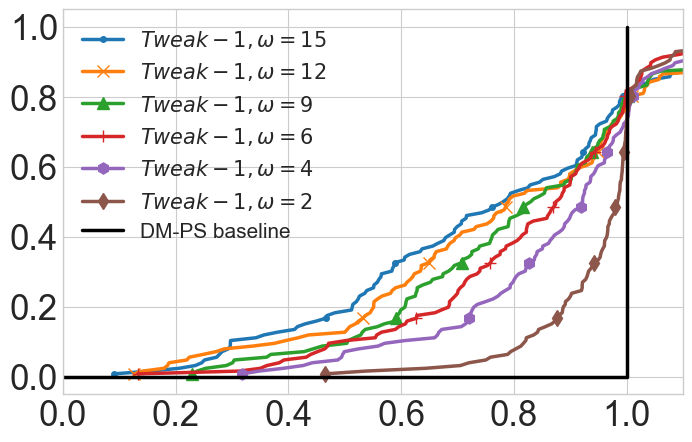

In [28]:
import seaborn as sns
pallete = sns.color_palette()

plt.style.use('seaborn-whitegrid')
markerlist = ['.','x','^','+','h','d']
plt.figure(figsize=(8,5))
for s,k in enumerate(gaussian_xshift_logging):
    robust = dic_robust[k]
    robust_r = dic_robust_r[k]
    ratio = np.array(robust_r)/np.array(robust)
    ratio.sort()
    y_dm = []
    l = k.split(',')[0].split('[')[1]
    l = '$' + 'Tweak-1, \\omega = ' + l + '$'
    for i in range(len(ratio)):
        y_dm.append((i+1)/len(ratio))
    plt.plot(ratio,y_dm,label = l,marker =markerlist[s],markevery=20,linewidth=2.5,markersize=8)
plt.plot([0,1] + list(np.ones(len(y_dm))),[0,0] + y_dm,c = 'black',label = 'DM-PS baseline',linewidth=2.5,markersize=6,)
plt.xticks( size = 25)
plt.yticks( size = 25)
plt.xlim([0,1.1])
plt.legend(fontsize = 15)
plt.savefig('plot_pdf/xshift_gaussian_change.pdf',dpi=600,bbox_inches = 'tight')